# ตัวอย่าง $f(x)$ เป็น square wave ที่มีคาบเท่ากับ $2\pi$

ตัวอย่างการ plot กราฟฟังก์ชั่น $\sin(x)$ สำหรับค่า $x$ ตั้งแต่ $0$ ถึง $2\pi$ (1 คาบ) จำนวน 100 จุด



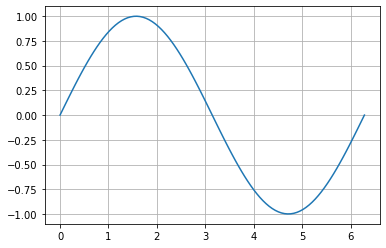

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(0,2*math.pi,100)
f1 = np.sin(x)

plt.grid()
plt.plot(x,f1)
plt.show()

ตัวอย่างการ plot กราฟฟังก์ชั่น $\cos(x)$ สำหรับค่า $x$ ตั้งแต่ $0$ ถึง $2\pi$ (1 คาบ) จำนวน 100 จุด และกราฟ $\cos(nx)$ สำหรับ $n = 3, 5, ...$ ให้สังเกตว่าคาบของ $\cos(nx)$ สั้นกว่าคาบของ $\cos(x)$ อยู่ $n$ เท่า (พูดอีกอย่างว่า ความถี่เพิ่มขึ้น $n$ เท่า)

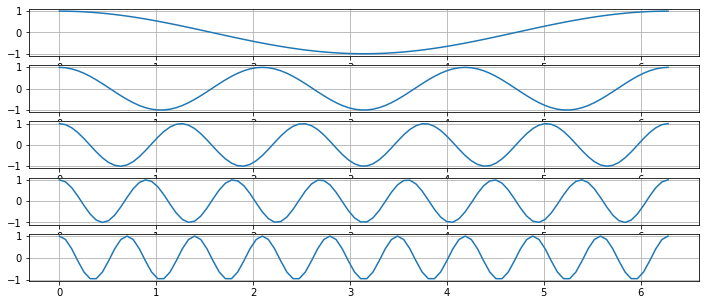

In [ ]:
f1 = np.cos(x)
f2 = np.cos(3*x)
f3 = np.cos(5*x)
f4 = np.cos(7*x)
f5 = np.cos(9*x)

plt.figure(figsize=(12,5))
plt.subplot(5,1,1)
plt.grid()
plt.plot(x,f1)
plt.subplot(5,1,2)
plt.grid()
plt.plot(x,f2)
plt.subplot(5,1,3)
plt.grid()
plt.plot(x,f3)
plt.subplot(5,1,4)
plt.grid()
plt.plot(x,f4)
plt.subplot(5,1,5)
plt.grid()
plt.plot(x,f5)
plt.show()

พล็อต $\cos(x) - \frac{1}{3}\cos(3x) + \frac{1}{5}\cos(5x) - \frac{1}{7}\cos(7x) + \frac{1}{9}\cos(9x)$

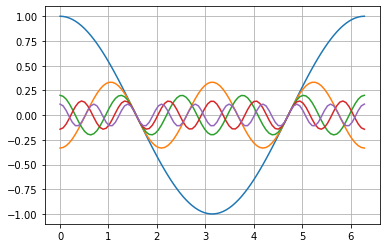

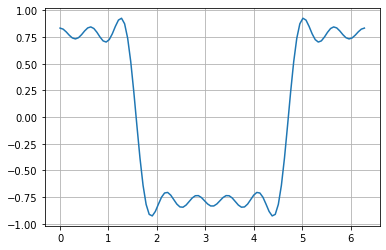

In [ ]:
f1 = np.cos(x)
f2 = (-1/3)*np.cos(3*x)
f3 = (1/5)*np.cos(5*x)
f4 = (-1/7)*np.cos(7*x)
f5 = (1/9)*np.cos(9*x)

sum_f = f1+f2+f3+f4+f5

plt.grid()
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
plt.plot(x,f4)
plt.plot(x,f5)
plt.show()

plt.grid()
plt.plot(x,sum_f)
plt.show()

$\frac{\pi}{4} = \cos(x) - \frac{1}{3}\cos(3x) + \frac{1}{5}\cos(5x) - \frac{1}{7}\cos(7x) + \frac{1}{9}\cos(9x) - \dots$

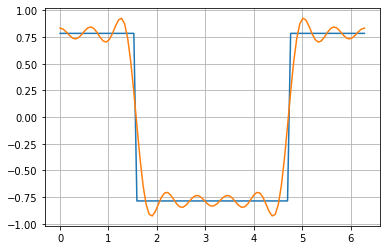

In [ ]:
def p(a):
    y = (math.pi/4)*np.ones(len(a))
    y[a>=math.pi/2]=-math.pi/4
    y[a>3*math.pi/2]=math.pi/4
    return y
y = p(x)
plt.grid()
plt.plot(x,y)
plt.plot(x,sum_f)
plt.show();

# ตัวอย่างการวิเคราะห์ spectrum ของสัญญาณ

สร้างสัญญาณตัวอย่างจาก $\frac{4}{\pi}(\sin(2\pi{f_0}t) + \frac{1}{3}\sin(6\pi{f_0}t) + \frac{1}{5}\sin(10\pi{f_0}t) + \frac{1}{7}\sin(14\pi{f_0}t) + \frac{1}{9}\sin(18\pi{f_0}t))$ เมื่อ $f_0$ เท่ากับ 5 Hz โดยสัญญาณยาว 1 วินาที และมีจำนวน 400 จุด (samples) (พูดอีกอย่างว่า sampling rate = 400 samples ต่อวินาที หรือ 400 Hz)

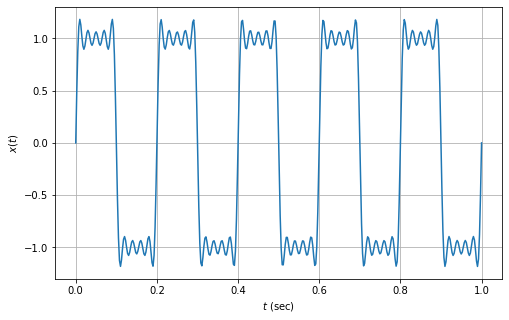

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 400
dT = 1.0/400.0
t = np.linspace(0.0, N*dT, N)
f = 5

y1 = (4/(1*math.pi))*(np.sin(1*f*2.0*np.pi*t))
y2 = (4/(3*math.pi))*(np.sin(3*f*2.0*np.pi*t))
y3 = (4/(5*math.pi))*(np.sin(5*f*2.0*np.pi*t))
y4 = (4/(7*math.pi))*(np.sin(7*f*2.0*np.pi*t))
y5 = (4/(9*math.pi))*(np.sin(9*f*2.0*np.pi*t))

y = y1 + y2 + y3 + y4 + y5

plt.plot(t, y)
plt.xlabel("$t$ (sec)")
plt.ylabel("$x(t)$")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid()
plt.show()

ใช้ FFT เพื่อดู spectrum ของสัญญาณ

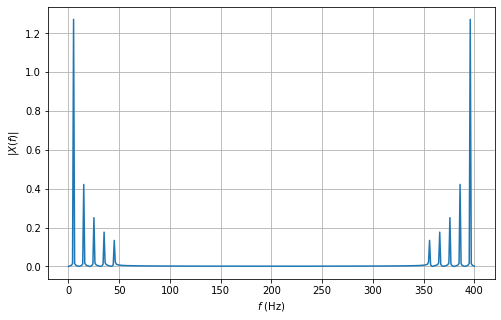

In [ ]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(1.0*dT), N)
plt.xlabel("$f$ (Hz)")
plt.ylabel("$|X(f)|$")
plt.plot(xf, 2.0/N * np.abs(yf[0:N]))
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid()
plt.show()

แต่โดยทั่วไป เราใช้แค่ positive frequencies เพราะ spectrum ส่วน negative frequencies (ความถี่เกินครึ่งหนึ่งของ sampling rate) จะ mirror กับส่วน positive frequencies

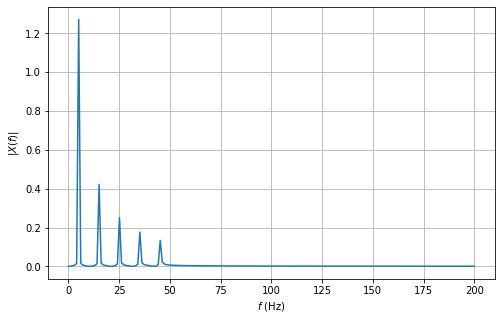

In [ ]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dT), N//2)
plt.xlabel("$f$ (Hz)")
plt.ylabel("$|X(f)|$")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid()
plt.show()

ทดลองเพิ่ม component ที่ความถี่ 150 Hz (หรือ $\sin(60\pi{f_0}t)$) เข้าไปในสัญญาณตัวอย่าง แล้วดู spectrum

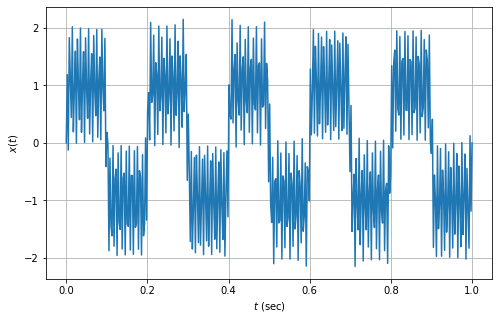

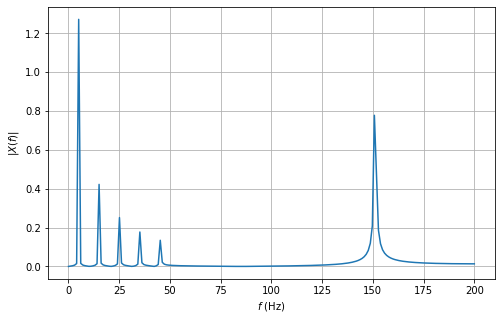

In [ ]:
y_new = y + np.sin(30*f*2.0*np.pi*t)

plt.plot(t, y_new)
plt.xlabel("$t$ (sec)")
plt.ylabel("$x(t)$")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid()
plt.show()

yf = np.fft.fft(y_new)

plt.xlabel("$f$ (Hz)")
plt.ylabel("$|X(f)|$")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid()
plt.show()

ทดลองสร้าง High-pass filter ที่ยอมให้ความถี่เกิน 50 Hz ผ่านไปได้

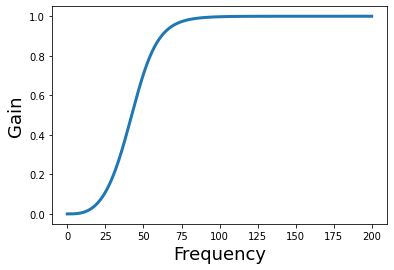

In [ ]:
from scipy.signal import butter, filtfilt, freqz

filter_order = 3
frequency_cutoff = 50
sampling_frequency = 400

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='high', output='ba', fs=sampling_frequency)

def rad_sample_to_hz(x, fs):
    return (x*fs)/(2*np.pi)

def plot_filter(b, a, fs):
    w, h = freqz(b, a, worN=512*2, whole=False)
    plt.plot(rad_sample_to_hz(w, fs), abs(h), linewidth=3)
    plt.ylabel('Gain', fontsize=18)
    plt.xlabel('Frequency', fontsize=18)

plot_filter(b, a, sampling_frequency)

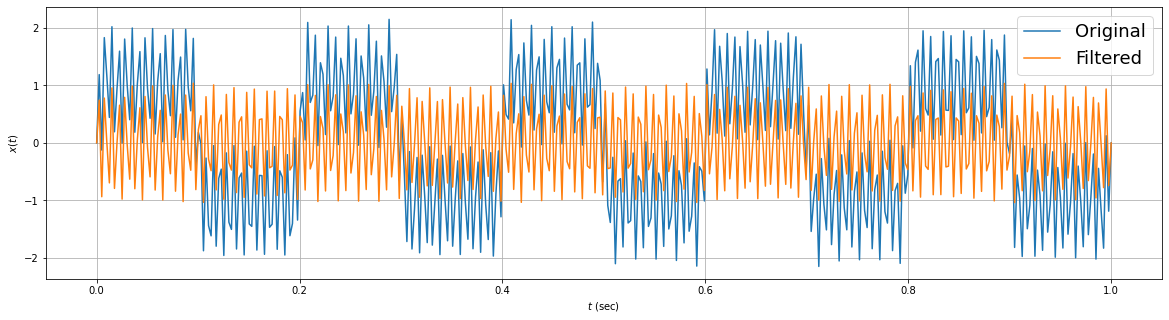

In [ ]:
signal = y_new
filtered = filtfilt(b, a, signal)
plt.figure(figsize=(20,5))
plt.xlabel("$t$ (sec)")
plt.ylabel("$x(t)$")
plt.grid()
plt.plot(t, signal)
plt.plot(t, filtered)
plt.legend(['Original','Filtered'], fontsize=18)

ดู spectrum ของสัญญาณที่ผ่านตัวกรอง

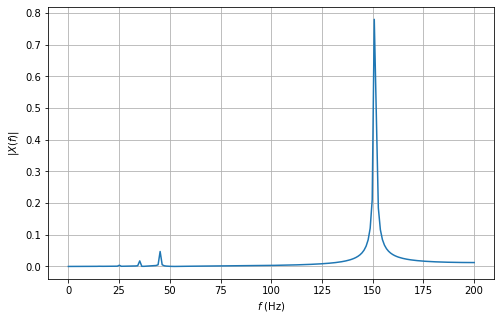

In [ ]:
yf = np.fft.fft(filtered)

plt.xlabel("$f$ (Hz)")
plt.ylabel("$|X(f)|$")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid()
plt.show()

ตัวอย่าง Low-pass filter

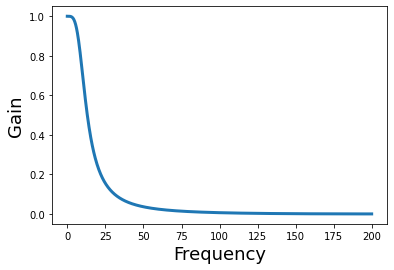

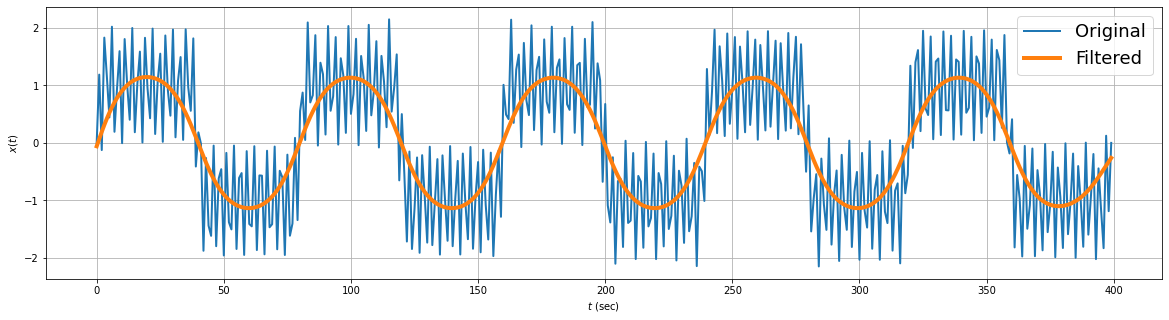

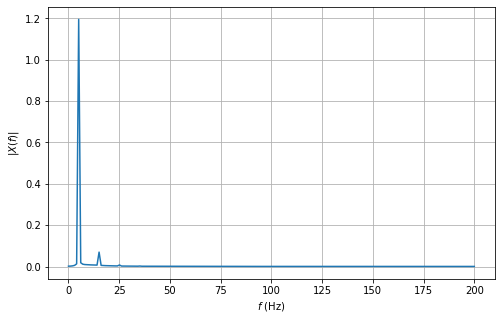

In [ ]:
from scipy.signal import butter, filtfilt

filter_order = 2
frequency_cutoff = 10
sampling_frequency = 400

# Create the filter
b, a = butter(filter_order, frequency_cutoff, btype='low', output='ba', fs=sampling_frequency)

plot_filter(b, a, sampling_frequency)

# Apply the filter
filtered = filtfilt(b, a, signal)

plt.figure(figsize=(20,5))
plt.plot(signal, linewidth=2)
plt.plot(filtered, linewidth=4)
plt.xlabel("$t$ (sec)")
plt.ylabel("$x(t)$")
plt.legend(['Original','Filtered'], fontsize=18)
plt.grid()
plt.show()

yf = np.fft.fft(filtered)

plt.xlabel("$f$ (Hz)")
plt.ylabel("$|X(f)|$")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid()
plt.show()

# ตัวอย่างใช้ PCA กับ Breast Cancer

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
print(breast_data.shape)
print(breast_labels.shape)
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
print(final_breast_data.shape)

(569, 30)
(569,)
(569, 31)


In [ ]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
print(features.shape)
print(features)
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

(30,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [ ]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
print(x.shape)
print(np.mean(x))
print(np.std(x))

(569, 30)
-6.826538293184326e-17
1.0


In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
print(principal_breast_Df.tail())
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

     principal component 1  principal component 2
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637
Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

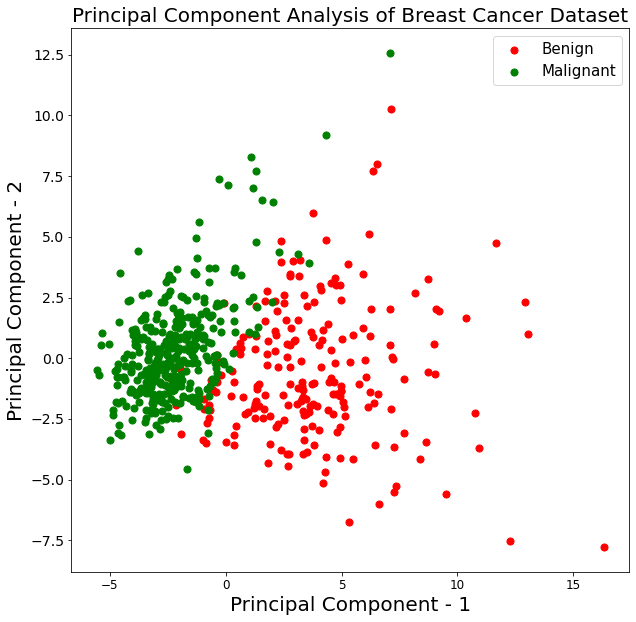

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2']
                , c = color, s = 50)
plt.legend(targets,prop={'size': 15})

# ตัวอย่าง ICA กับการแก้ปัญหา linear mixture

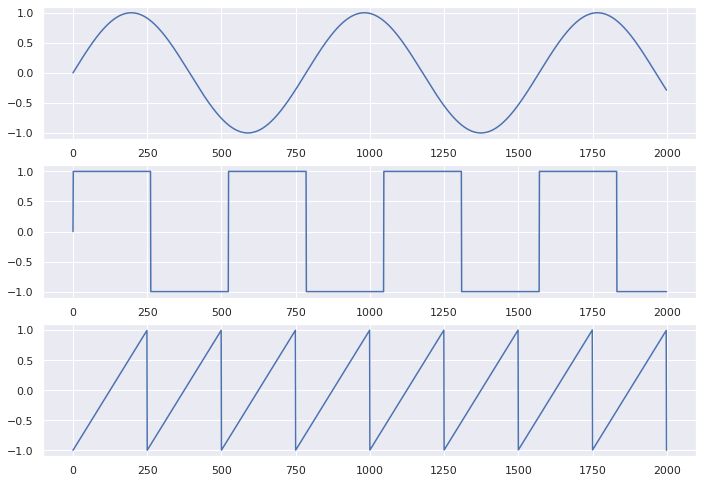

In [ ]:
import numpy as np
import seaborn as sns
from scipy import signal
from matplotlib import pyplot as plt
from sklearn.decomposition import FastICA

sns.set(rc={'figure.figsize':(11.7,8.27)})

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(s1)
ax2.plot(s2)
ax3.plot(s3)
plt.show()

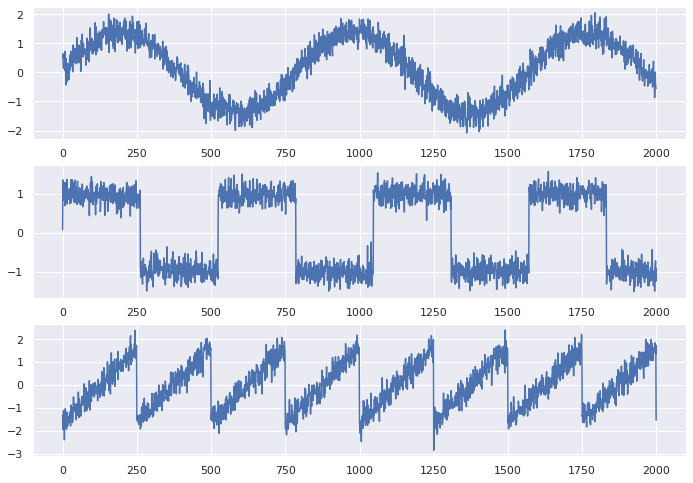

In [ ]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(S[:,0])
ax2.plot(S[:,1])
ax3.plot(S[:,2])
plt.show()

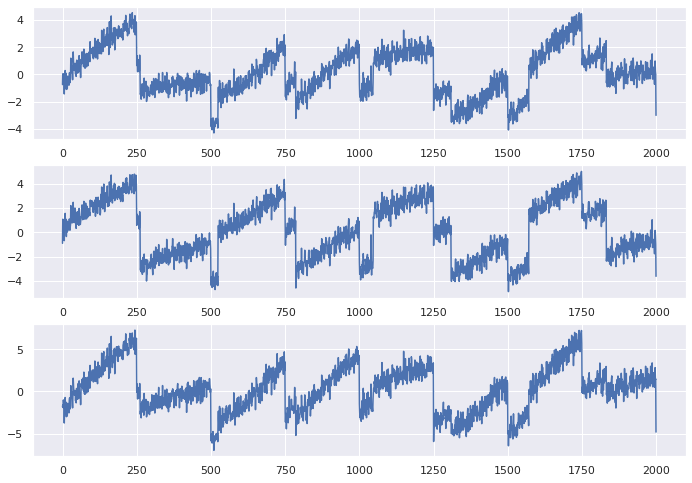

In [ ]:
A = np.array([[1,1,1],[0.5,2,1.0],[1.5,1.0,2.0]])
X = np.dot(S, A.T)
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(X[:,0])
ax2.plot(X[:,1])
ax3.plot(X[:,2])
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


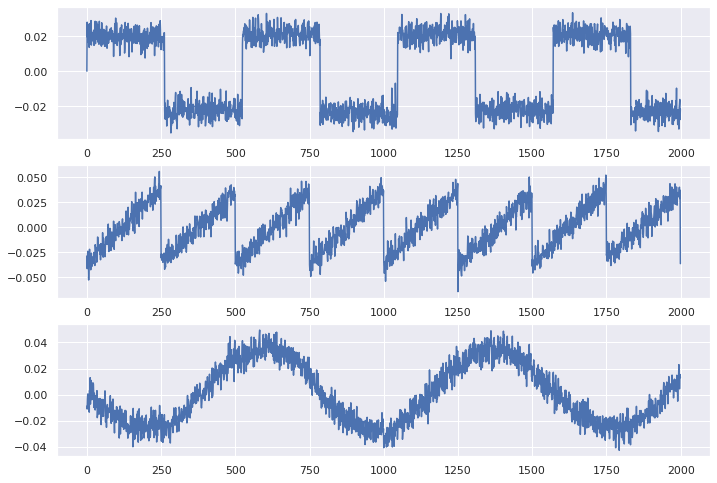

In [ ]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(S_[:,0])
ax2.plot(S_[:,1])
ax3.plot(S_[:,2])
plt.show()